Trabajo Práctico N° 2

#Data acquisition

In [2]:
import pandas as pd
df = pd.read_csv("sym_h_reduced.csv")

In [3]:
print(df) #usaremos solo symh

       Unnamed: 0            timestamp        DATE          TIME  DOY  ASY-D  \
0         3201120  2013-02-01 00:00:00  2013-02-01  00:00:00.000   32   15.0   
1         3201121  2013-02-01 00:01:00  2013-02-01  00:01:00.000   32   14.0   
2         3201122  2013-02-01 00:02:00  2013-02-01  00:02:00.000   32   13.0   
3         3201123  2013-02-01 00:03:00  2013-02-01  00:03:00.000   32   13.0   
4         3201124  2013-02-01 00:04:00  2013-02-01  00:04:00.000   32   13.0   
...           ...                  ...         ...           ...  ...    ...   
40315     3241435  2013-02-28 23:55:00  2013-02-28  23:55:00.000   59   24.0   
40316     3241436  2013-02-28 23:56:00  2013-02-28  23:56:00.000   59   24.0   
40317     3241437  2013-02-28 23:57:00  2013-02-28  23:57:00.000   59   23.0   
40318     3241438  2013-02-28 23:58:00  2013-02-28  23:58:00.000   59   21.0   
40319     3241439  2013-02-28 23:59:00  2013-02-28  23:59:00.000   59   21.0   

       ASY-H  SYM-D  SYM-H  
0       34

#Plot

In [4]:
data = df["SYM-H"]
print(data.shape)

(40320,)


In [5]:
print(data)

0       -10.0
1       -10.0
2       -10.0
3       -10.0
4       -10.0
         ... 
40315   -26.0
40316   -26.0
40317   -27.0
40318   -28.0
40319   -28.0
Name: SYM-H, Length: 40320, dtype: float64


In [6]:
min(data)

-45.0

In [7]:
max(data)

16.0

In [8]:
#Para ver si hay valores faltantes
miss_values_count = data.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count)
#No hay valores faltantes

[]


In [9]:
 #Otra forma de ver valores faltantes
 from math import isnan
 sum(map(isnan, data)) 

0

In [10]:
#Estadisticas
import statistics as stat

media = stat.mean(data)
print(media)
mediana =stat.median(data)
print(mediana)

desviacion = stat.pstdev(data)
print(desviacion)

-8.146478174603175
-8.0
9.760267411194004


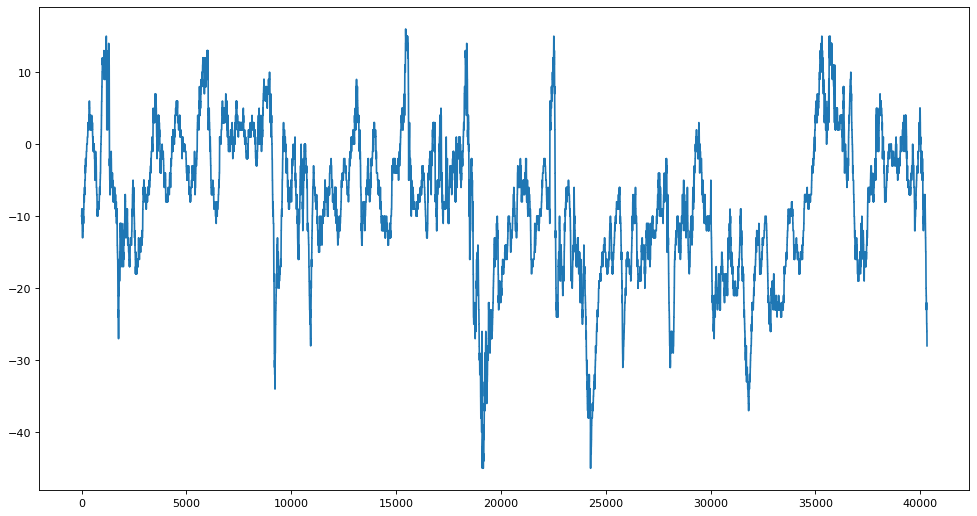

In [11]:
from matplotlib import pyplot as plt
plt.figure(figsize = (15,8), dpi=80)
plt.plot(data)

#Funcion
Selección de intervalo en la serie de tiempo.

In [12]:
# tres variables para determinar fecha de inicio y 3 para determinar dia de fi
ddI = "01"
mmI = "02"
yyI = "2013"
yymmddI = str(yyI) +"-"+ str(mmI) + "-" + str(ddI)

ddE = "10"
mmE = "02"
yyE = "2013"
yymmddE = str(yyE) + "-" + str(mmE) + "-" +str(ddE)

#Esto se queda solo con los dias del 01 02 2013 hasta 10 02 2013
dataReduced = df.loc[(df.timestamp >= yymmddI) & (df.timestamp<= yymmddE)]


In [13]:
def seleccion_intervalos(ddI,mmI,yyI,ddE,mmE,yyE,frame):
  yymmddI = str(yyI) +"-"+ str(mmI) + "-" + str(ddI)
  yymmddE = str(yyE) + "-" + str(mmE) + "-" +str(ddE)
  datos = frame.loc[(frame.timestamp >= yymmddI) & (frame.timestamp<= yymmddE)]
  return datos

In [14]:
DatosReducidos = seleccion_intervalos("01","02","2013","10","02","2013",df)

In [15]:
print(DatosReducidos.shape)

(12960, 9)


#Split de datos

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
dataSet = dataReduced["SYM-H"]
print(dataSet.shape)

(12960,)


In [18]:
data_train, data_test = train_test_split(dataSet, test_size = 0.2, shuffle = False)
print(data_train.shape)
print(data_test.shape)

(10368,)
(2592,)


In [19]:
#Escalador
#Normalizacion que se basa en minimo y maximo #Estandarizacion divide en desvio estandar
#Antes de esto sacar outliers o suavizar los datos
#Usamos normalizacion
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
#transformo los datos a un arreglo
data_train = data_train.to_numpy()
#data_train = data_train.to_numpy()
data_train = data_train.reshape((-1,1))
data_train_scaled = scaler.fit_transform(data_train)

In [21]:
data_test = data_test.to_numpy()
#data_train = data_train.to_numpy()
data_test = data_test.reshape((-1,1))
data_test_scaled = scaler.transform(data_test)

#Funcion split sliding window

In [22]:
#Defino la funcion sliding window
from numpy import array
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    if(out_end_ix > len(sequence)):
      break
    seq_x, seq_y = sequence[i:end_ix] , sequence[end_ix:out_end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X),array(y)

In [23]:
#Probamos la funcion
n_steps_in = 6
n_steps_out = 4

X, y =split_sequence(data_train_scaled, n_steps_in, n_steps_out)

# Modelo

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()
model.add(Dense(50, activation= "tanh", input_dim=n_steps_in))
model.add(Dense(n_steps_out))

model.compile(optimizer ="adam", loss="mse")
#epoca es una iteracion sobre el set de entrenamiento
history = model.fit(X,y, epochs = 8,validation_split= 0.2, verbose =2)

Epoch 1/8
259/259 - 1s - loss: 0.0078 - val_loss: 9.1969e-04 - 1s/epoch - 5ms/step
Epoch 2/8
259/259 - 0s - loss: 5.1517e-04 - val_loss: 6.0324e-04 - 418ms/epoch - 2ms/step
Epoch 3/8
259/259 - 0s - loss: 3.7899e-04 - val_loss: 5.6186e-04 - 405ms/epoch - 2ms/step
Epoch 4/8
259/259 - 0s - loss: 3.5029e-04 - val_loss: 5.5614e-04 - 496ms/epoch - 2ms/step
Epoch 5/8
259/259 - 0s - loss: 3.3522e-04 - val_loss: 5.0379e-04 - 490ms/epoch - 2ms/step
Epoch 6/8
259/259 - 0s - loss: 3.1279e-04 - val_loss: 4.8241e-04 - 419ms/epoch - 2ms/step
Epoch 7/8
259/259 - 0s - loss: 2.9308e-04 - val_loss: 4.3925e-04 - 486ms/epoch - 2ms/step
Epoch 8/8
259/259 - 0s - loss: 2.7669e-04 - val_loss: 4.2058e-04 - 409ms/epoch - 2ms/step


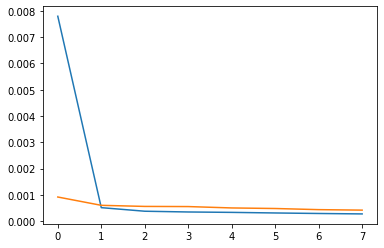

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

#Prediccion

In [27]:
#WALKING FOWARD
y_hat_matrix= list()
for i in range(len(data_train_scaled)):
  j = i*n_steps_in
  k= (i+1)*n_steps_in
  if(k>len(data_train_scaled)):
    break
  y_hat_i = model.predict(data_train_scaled[j:k,:].reshape((1,-1)))
  y_hat_matrix.append(y_hat_i)

In [ ]:
#Predecir para uno
#y_hat_1 = model.predict(data_train_scaled[-5:].reshape((1,-1)))

In [ ]:
#Para todos 
y_hat_matrix

#Validacion

In [33]:
#Validacion
from sklearn.metrics import mean_squared_error as mse

In [ ]:
#Para 1
#mse(y_hat_1, data_test_scaled[0:3].reshape((1,-1)))

In [ ]:
y_hat_matrix[2]

In [40]:
mse(y_hat_matrix[1], data_test_scaled[4:8].reshape((1,-1)))

0.00025183815808903605

In [ ]:
#Para todos
#errores = list()
#for i in range(len(y_hat_matrix)):
 # l = i*n_steps_out
 # m = (i+1)*n_steps_out
 # if(m>len(data_test_scaled)):
 #   break
 # error_i = mse(y_hat_matrix[i], data_test_scaled[l:m,:].reshape((1,-1)))
 # errores.append(error_i)